In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

first_df = pd.read_csv('First_Day_Dataset.csv')

## 가격 데이터프레임을 수익률 데이터 프레임으로 바꿔주기

In [2]:
pct_df = first_df

In [3]:
pct_df['S&P'] = pct_df.loc[:,'^GSPC'].pct_change()
pct_df['EurAsia'] = pct_df.loc[:,'EFA'].pct_change()
pct_df['Real_Estate'] = pct_df.loc[:,'^FNAR'].pct_change()
pct_df['Commodity'] = pct_df.loc[:,'GD=F'].pct_change()


In [4]:
pct_df = pct_df.drop(['^GSPC', 'EFA', '^FNAR', 'GD=F'] , axis=1)

In [5]:
pct_df = pct_df.dropna()

In [6]:
pct_df = pct_df.drop(['Unnamed: 0'] , axis=1)

# Buy&Hold Strategy

In [7]:
DF_BuyHold = []

In [8]:
#투자비중
W = [0.24295694, 0.69729744, 0.04978756, 0.00995805]
W

[0.24295694, 0.69729744, 0.04978756, 0.00995805]

In [9]:
# 투자 원금
Total = 1000000
first_port = []

sp500_start = W[0]*Total
EFA_start = W[1]*Total
RealEstate_start = W[2]*Total
Commodity_start = W[3]*Total
total_price = sp500_start+EFA_start+RealEstate_start+Commodity_start


first_port.append(sp500_start)
first_port.append(EFA_start)
first_port.append(RealEstate_start)
first_port.append(Commodity_start)
first_port.append(total_price)


DF_BuyHold.append(first_port)
DF_BuyHold


[[242956.94,
  697297.4400000001,
  49787.560000000005,
  9958.05,
  999999.9900000002]]

In [ ]:
for i in range(len(pct_df)):
    current_sp = DF_BuyHold[i][0]* (1+ (pct_df['S&P'].iloc[i]))
    current_EurAsia = DF_BuyHold[i][1]* (1+ (pct_df['EurAsia'].iloc[i]))
    current_Real_Estate = DF_BuyHold[i][2]* (1+ (pct_df['Real_Estate'].iloc[i]))
    current_Commodity = DF_BuyHold[i][3]* (1+ (pct_df['Commodity'].iloc[i]))
    
    current_total_price = current_sp + current_EurAsia + current_Real_Estate + current_Commodity
    
    current_portfolio = []
    current_portfolio.append(current_sp)
    current_portfolio.append(current_EurAsia)
    current_portfolio.append(current_Real_Estate)
    current_portfolio.append(current_Commodity)
    current_portfolio.append(current_total_price)
    
    
    DF_BuyHold.append(current_portfolio)
                                   
DF_BuyHold                                   

In [11]:
pct_df

,S&P,EurAsia,Real_Estate,Commodity
1,0.037762,0.043807,-0.009725,0.079894
2,0.032713,0.004522,0.038322,-0.015849
3,-0.009316,-0.028093,0.034129,-0.019524
4,-0.090894,-0.137484,-0.076239,-0.156250
5,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...
85,0.057368,0.035352,0.001521,0.049428
86,0.070430,0.028296,0.013770,0.046954
87,-0.041356,-0.015834,-0.028864,-0.047209
88,-0.020871,-0.028585,-0.024425,0.008015


In [12]:
df_buyHold = pd.DataFrame(
      DF_BuyHold,
      columns=['sp', 'EurAsia', 'Real_Estate', 'Commodity','Total_Price'])
df_buyHold

,sp,EurAsia,Real_Estate,Commodity,Total_Price
0,242956.940000,6.972974e+05,49787.560000,9958.050000,1.000000e+06
1,252131.427621,7.278437e+05,49303.366247,10753.638243,1.040032e+06
2,260379.305431,7.311353e+05,51192.747971,10583.209097,1.053291e+06
3,257953.553881,7.105957e+05,52939.918834,10376.582204,1.031866e+06
4,234507.250341,6.129002e+05,48903.817019,8755.241234,9.050665e+05
...,...,...,...,...,...
85,604527.192906,1.076297e+06,66883.413459,5187.537174,1.752895e+06
86,647104.117426,1.106752e+06,67804.402511,5431.115283,1.827091e+06
87,620342.163915,1.089227e+06,65847.302068,5174.717176,1.780592e+06
88,607395.116233,1.058092e+06,64238.957938,5216.193341,1.734942e+06


## 수익률

In [13]:
Return = df_buyHold.loc[:,'Total_Price'].pct_change()
Return = Return.dropna()
Return

1     0.040032
2     0.012748
3    -0.020341
4    -0.122883
5     0.093959
        ...   
85    0.041530
86    0.042328
87   -0.025450
88   -0.025637
89    0.135461
Name: Total_Price, Length: 89, dtype: float64

In [14]:
df_1 = df_buyHold.loc[:,'sp'].pct_change()
df_2 = df_buyHold.loc[:,'EurAsia'].pct_change()
df_3 = df_buyHold.loc[:,'Real_Estate'].pct_change()
df_4 = df_buyHold.loc[:,'Commodity'].pct_change()

df_buyHold_return = pd.concat([df_1,df_2,df_3,df_4], axis=1)
df_buyHold_return = df_buyHold_return.dropna()
df_buyHold_return

,sp,EurAsia,Real_Estate,Commodity
1,0.037762,0.043807,-0.009725,0.079894
2,0.032713,0.004522,0.038322,-0.015849
3,-0.009316,-0.028093,0.034129,-0.019524
4,-0.090894,-0.137484,-0.076239,-0.156250
5,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...
85,0.057368,0.035352,0.001521,0.049428
86,0.070430,0.028296,0.013770,0.046954
87,-0.041356,-0.015834,-0.028864,-0.047209
88,-0.020871,-0.028585,-0.024425,0.008015


# Variance of Portfolio

In [15]:
Variance = []

for i in range(2,len(df_buyHold_return)+2):
    covariance = df_buyHold_return.iloc[:i,:].cov()    
    
    current_Var = 0
    for i in range(4):
        for j in range(4):
            current_Var += W[i] * W[j] * covariance.iloc[i, j]
    Variance.append(current_Var)        

    
len(Variance)

89

## Sharp Ratio

In [16]:
sharp = []
risk_free_rate=0.01
for i in range(1,len(Return)+1):
    sharp_each = (Return[i] - risk_free_rate)/np.sqrt(Variance[i-1])
    sharp.append(sharp_each)
    
len(sharp)

89

## MDD

In [17]:
Total_Price = df_buyHold.loc[:,'Total_Price']
Total_Price

0     1.000000e+06
1     1.040032e+06
2     1.053291e+06
3     1.031866e+06
4     9.050665e+05
          ...     
85    1.752895e+06
86    1.827091e+06
87    1.780592e+06
88    1.734942e+06
89    1.969960e+06
Name: Total_Price, Length: 90, dtype: float64

In [18]:
MDD = []
for i in range(1,len(Total_Price)):
    minimum = min(Total_Price[:i+1])
    maximum = max(Total_Price[:i+1])
                  
    current_MDD = (minimum-maximum)/maximum
    MDD.append(current_MDD)
    
len(MDD)

89

In [19]:
Eval_BuyHold = pd.DataFrame(
    {"Return": Return,
    "Variance": Variance,
    "Sharp_ratio": sharp,
    "MDD": MDD})
Eval_BuyHold

,Return,Variance,Sharp_ratio,MDD
1,0.040032,0.000369,1.562567,-0.038491
2,0.012748,0.000914,0.090876,-0.050594
3,-0.020341,0.005109,-0.424503,-0.050594
4,-0.122883,0.006584,-1.637619,-0.140725
5,0.093959,0.005268,1.156768,-0.140725
...,...,...,...,...
85,0.041530,0.002111,0.686215,-0.501691
86,0.042328,0.002098,0.705866,-0.504641
87,-0.025450,0.002086,-0.776127,-0.504641
88,-0.025637,0.002260,-0.749673,-0.504641


In [20]:
print("Return의 mean: ", Eval_BuyHold['Return'].mean())
print("Variance의 mean: ", Eval_BuyHold['Variance'].mean())
print("Sharp_ratio의 mean: ", Eval_BuyHold['Sharp_ratio'].mean())
print("MDD의 mean: ", Eval_BuyHold['MDD'].mean())


Return의 mean:  0.008792010377117571
Variance의 mean:  0.002110065389163123
Sharp_ratio의 mean:  -0.019826510205170882
MDD의 mean:  -0.375791230549409


<AxesSubplot: >

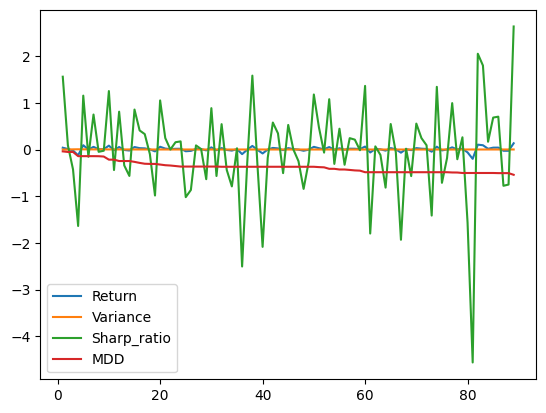

In [21]:
Eval_BuyHold.plot()